In [1]:
import numpy
import numpy as np
import cv2

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def threshold(gray_image: numpy.ndarray, thresholdValue, maxValue, thresh="BINARY"):
    threshold_image = gray_image.copy()
    height, width = gray_image.shape
    if thresh == "BINARY":
        v1 = maxValue; v2 = 0
    elif thresh == "BINARY_INV":
        v1 = 0; v2 = maxValue
    for i in range(height):
        for j in range(width):
            threshold_image[i,j] = v1 if threshold_image[i,j] >= thresholdValue else v2
    return threshold_image


def otsu_threshold(gray_image):
    hist = cv2.calcHist([gray_image],[0],None,[256],[0,256])
    hist_norm = hist.ravel()/hist.max()
    hist_norm_cumsum = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in range(255):
        p1,p2 = np.hsplit(hist_norm,[i])
        q1,q2 = hist_norm_cumsum[i],hist_norm_cumsum[255]-hist_norm_cumsum[i]
        b1,b2 = np.hsplit(bins,[i])
        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2 
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    return thresh, threshold(gray_image, thresh, 255)


def band_threshold(gray_image: numpy.ndarray, low_threshold, high_threshold, maxValue):
    threshold_image = gray_image.copy()
    height, width = gray_image.shape
    for i in range(height):
        for j in range(width):
            threshold_image[i,j] = maxValue if threshold_image[i,j] >= low_threshold and threshold_image[i,j] <= high_threshold else 0
    return threshold_image


def semi_threshold(gray_image: numpy.ndarray, thresholdValue):
    threshold_image = gray_image.copy()
    height, width = gray_image.shape
    for i in range(height):
        for j in range(width):
            threshold_image[i,j] = threshold_image[i,j] if threshold_image[i,j] <= thresholdValue else 0
    return threshold_image


def bitwise_and(binary1, binary2):
    return binary1 & binary2


def multiLevel_threshold(image: numpy.ndarray, thresholdValue, maxValue):
    threshold_image = image.copy()
    height, width, channels = image.shape
    for i in range(height):
        for j in range(width):
            threshold_image[i,j][0] = maxValue if threshold_image[i,j][0] >= thresholdValue else 0
            threshold_image[i,j][1] = maxValue if threshold_image[i,j][1] >= thresholdValue else 0
            threshold_image[i,j][2] = maxValue if threshold_image[i,j][2] >= thresholdValue else 0
    return threshold_image

In [3]:
image = cv2.imread('lab(thresh).jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## 1) Simple Thresholding

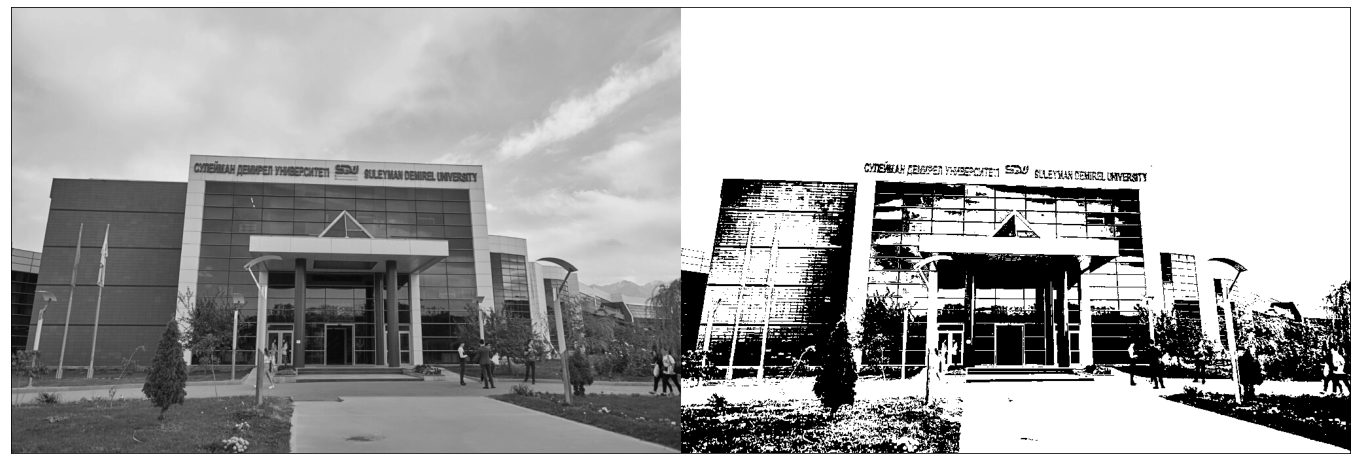

In [4]:
figure(figsize=(24, 12))
plt.imshow(numpy.hstack([ gray_image, threshold(gray_image, 85, 255) ]), cmap='gray')

plt.xticks([]), plt.yticks([]); plt.show()

## 2) Otsu Thresholding

<ipython-input-2-aaaf5259ef21>:25: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-2-aaaf5259ef21>:26: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
<ipython-input-2-aaaf5259ef21>:25: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2


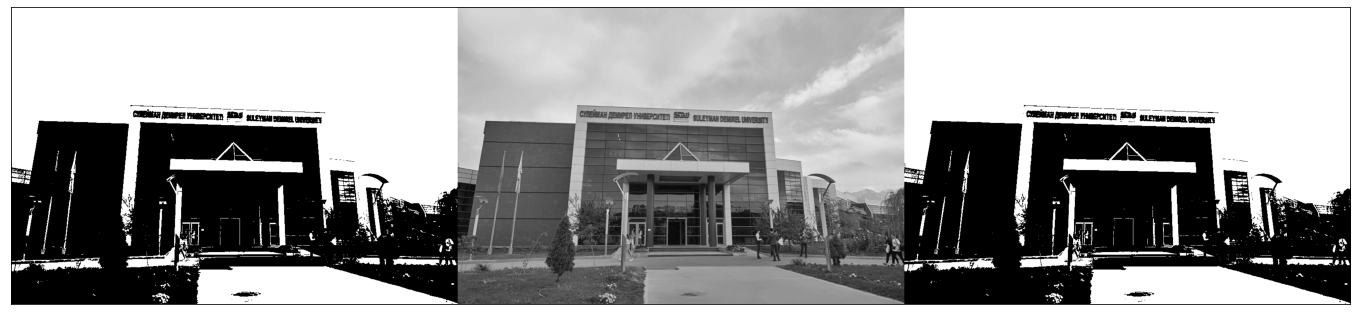

In [5]:
ret, imgf = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
figure(figsize=(24, 12))
plt.imshow(numpy.hstack([ imgf, gray_image, otsu_threshold(gray_image)[1] ]), cmap='gray')

plt.xticks([]), plt.yticks([]); plt.show()

## 3) Adaptive Thresholding

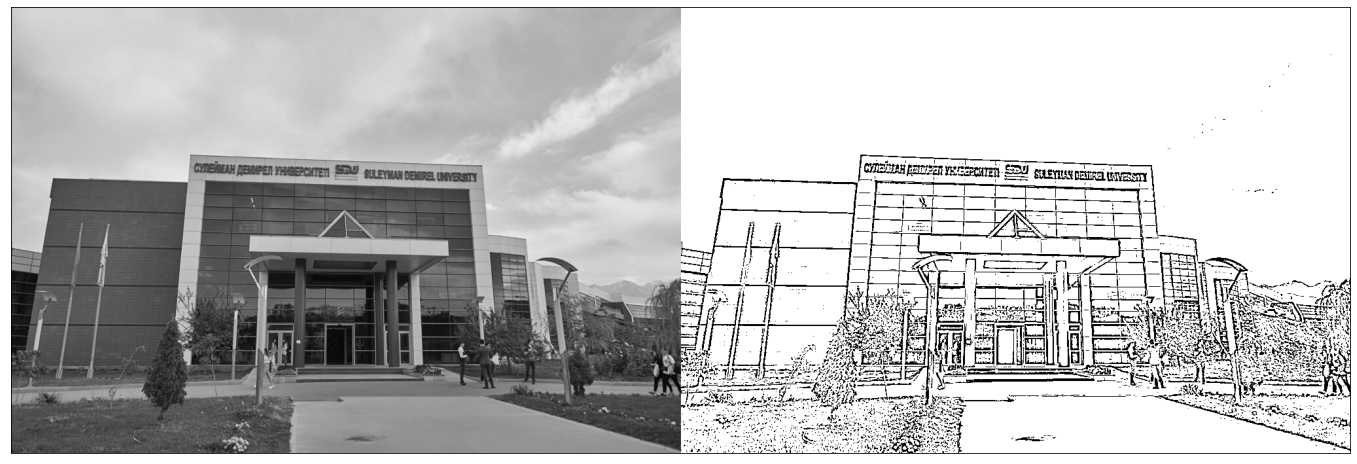

In [6]:
imgf = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
figure(figsize=(24, 12))
plt.imshow(numpy.hstack([ gray_image, imgf ]), cmap='gray')

plt.xticks([]), plt.yticks([]); plt.show()

## 4) Band Thresholding

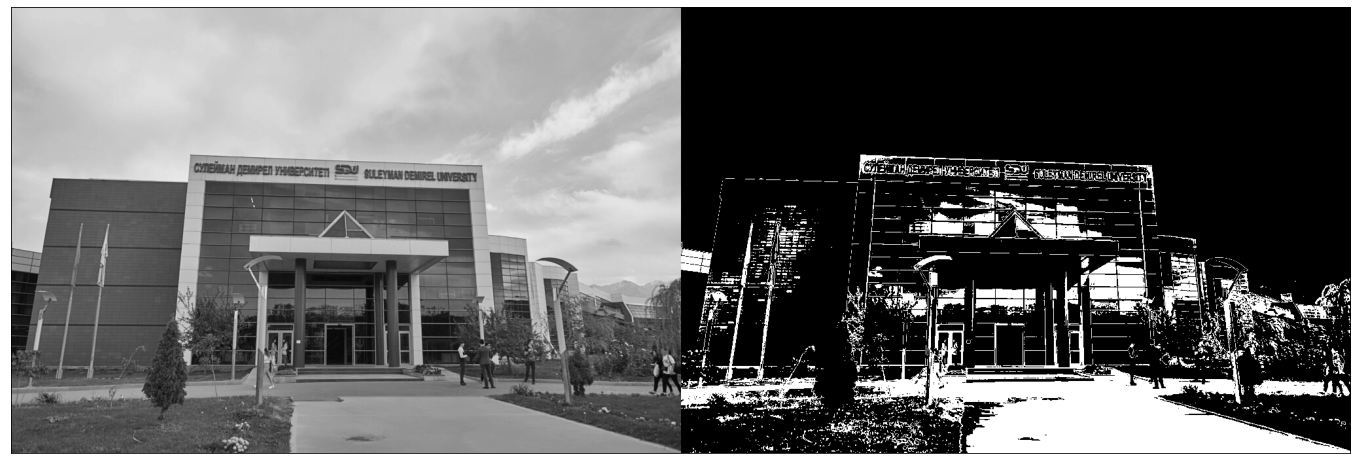

In [7]:
cv2.imshow('Band threshold 1 image', band_threshold(gray_image, 95, 160, 255))
binary1 = threshold(gray_image, 95, 255, "BINARY")
binary2 = threshold(gray_image, 160, 255, "BINARY_INV")
figure(figsize=(24, 12))
plt.imshow(numpy.hstack([ gray_image, bitwise_and(binary1, binary2) ]), cmap='gray')

plt.xticks([]), plt.yticks([]); plt.show()

## 5) Semi Thresholding

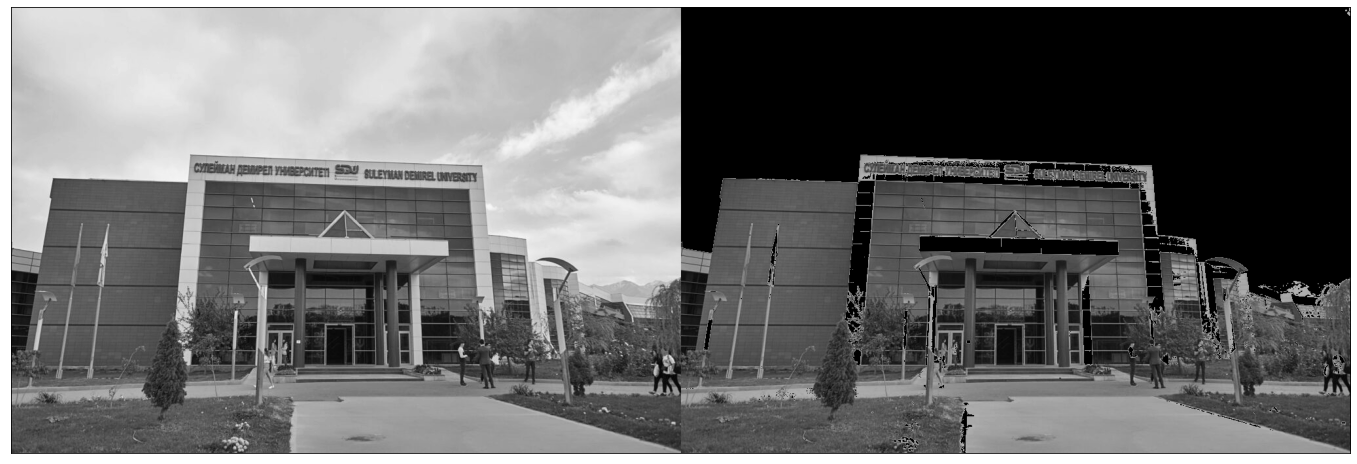

In [8]:
cv2.imshow('Semi threshold 1 image', semi_threshold(gray_image, 170))
binary = threshold(gray_image, 170, 255, "BINARY_INV")
figure(figsize=(24, 12))
plt.imshow(numpy.hstack([ gray_image, bitwise_and(gray_image, binary) ]), cmap='gray')

plt.xticks([]), plt.yticks([]); plt.show()

## 6) Multi-Level Thresholding

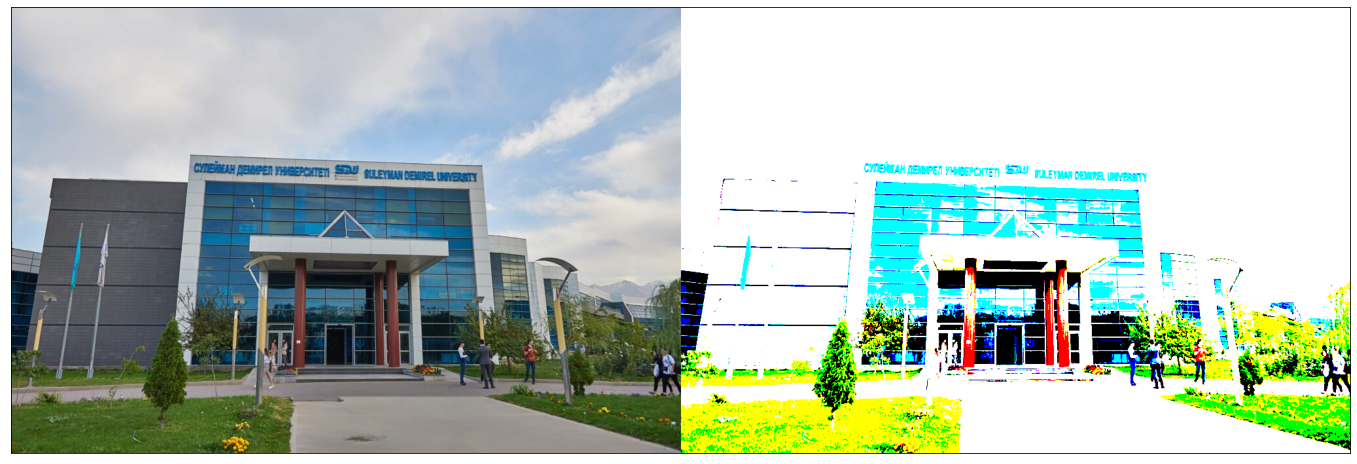

In [9]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rgb_multiLevel_image = cv2.cvtColor(multiLevel_threshold(image, 60, 255), cv2.COLOR_BGR2RGB)
figure(figsize=(24, 12))
plt.imshow( numpy.hstack([ rgb_image, rgb_multiLevel_image ]) )

plt.xticks([]), plt.yticks([]); plt.show()